In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [14]:
cluster_with_guastocavo_labels = pd.read_csv("real-time clusters/20230101-20240101_real_time_clusters_filtered_guasto_cavo.csv")
train_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Lavoro Programmato datasets/train_df_lp.parquet")
merge_train_df = pd.merge(train_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_train_df.set_index('cluster_id2', inplace=True)
val_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Lavoro Programmato datasets/val_df_lp.parquet")
merge_val_df = pd.merge(val_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_val_df.set_index('cluster_id2', inplace=True)
test_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Lavoro Programmato datasets/test_df_lp.parquet")
merge_test_df = pd.merge(test_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_test_df.set_index('cluster_id2', inplace=True)

In [15]:
# Caricare i dataset
# Separare le feature dalle etichette
X_train = merge_train_df.drop(columns=['GUASTO CAVO'])  # Sostituisci 'GUASTO CAVO' con il nome della colonna etichetta
y_train = merge_train_df['GUASTO CAVO']

X_val = merge_val_df.drop(columns=['GUASTO CAVO'])
y_val = merge_val_df['GUASTO CAVO']

X_test = merge_test_df.drop(columns=['GUASTO CAVO'])
y_test = merge_test_df['GUASTO CAVO']

In [16]:
# Inizializzare e allenare il modello Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8134057971014492
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.42      0.16      0.24        97
        True       0.84      0.95      0.89       455

    accuracy                           0.81       552
   macro avg       0.63      0.56      0.57       552
weighted avg       0.77      0.81      0.78       552

Test Accuracy: 0.779385171790235
Test Classification Report:
              precision    recall  f1-score   support

       False       0.42      0.11      0.18       117
        True       0.80      0.96      0.87       436

    accuracy                           0.78       553
   macro avg       0.61      0.53      0.52       553
weighted avg       0.72      0.78      0.73       553



Validation Accuracy: 0.8315217391304348
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.05      0.10        97
        True       0.83      1.00      0.91       455

    accuracy                           0.83       552
   macro avg       0.83      0.52      0.50       552
weighted avg       0.83      0.83      0.76       552

Test Accuracy: 0.7920433996383364
Test Classification Report:
              precision    recall  f1-score   support

       False       0.60      0.05      0.09       117
        True       0.80      0.99      0.88       436

    accuracy                           0.79       553
   macro avg       0.70      0.52      0.49       553
weighted avg       0.75      0.79      0.72       553



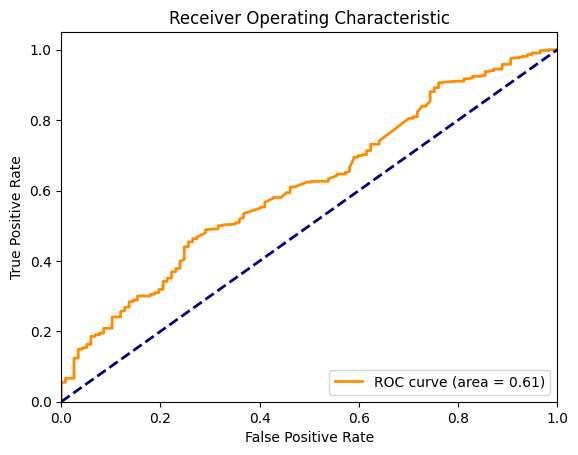

In [20]:
clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Tracciare la ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Inizializzare e allenare il modello SVM
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.8297101449275363
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.04      0.08        97
        True       0.83      1.00      0.91       455

    accuracy                           0.83       552
   macro avg       0.81      0.52      0.49       552
weighted avg       0.82      0.83      0.76       552

Test Accuracy: 0.7902350813743219
Test Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.02      0.03       117
        True       0.79      1.00      0.88       436

    accuracy                           0.79       553
   macro avg       0.73      0.51      0.46       553
weighted avg       0.76      0.79      0.70       553

